In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Magnetic field calibration

In this script, I will convert the voltage applied to the coils to a magnetic field, that was previously calibrated with a teslameter. As far as I applied a magnetic field ramp then I have to assign to each magnetic field value a time. Magnetic field calibration at a distance from the coil of 1 mm.

The voltage ramp was from 0V to 4V in 600 sec.

In [2]:
voltage = np.array([0,0.5,1,1.5,2,2.5,3])
B1 = np.array([-0.05,3.90,7.80,11.5,14.93,17.91,20.47])
B2 = np.array([-0.06,3.98,7.90,11.66,15.0,17.99,20.51])
B3 = np.array([-0.06,3.85,7.7,11.37,14.75,17.75,20.25])
B4 = np.array([-0.06,3.71,7.53,11.15,14.5,17.53,20.09])
B5 = np.array([-0.04,3.82,7.69,11.25,14.45,17.38,19.82])

In [3]:
meanB = np.mean([B1,B2,B3,B4,B5], axis = 0)
stdB = np.std([B1,B2,B3,B4,B5], axis = 0)

In [4]:
meanB

array([-0.054,  3.852,  7.724, 11.386, 14.726, 17.712, 20.228])

In [5]:
stdB

array([0.008     , 0.08930845, 0.12338557, 0.18028866, 0.22114249,
       0.22859571, 0.25458987])

In [6]:
err = stdB/np.sqrt(5)

In [7]:
linear_model, cov=np.polyfit(voltage,meanB,1, cov=True)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0,4)

In [8]:
linear_model_fn

poly1d([6.82628571, 0.55685714])

In [9]:
cov

array([[ 0.05080751, -0.07621127],
       [-0.07621127,  0.16512441]])

Text(0, 0.5, 'Magnetic field (mT)')

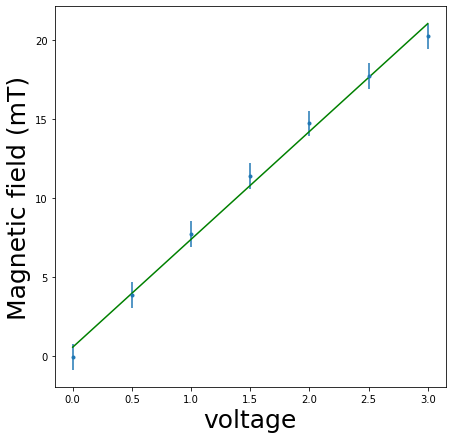

In [10]:
fig, ax1 = plt.subplots(figsize=(7,7))
plt.errorbar(voltage, meanB, yerr = 0.8, fmt = '.')
plt.plot(x_s,linear_model_fn(x_s),color="green")
plt.xlabel('voltage', size = 25)
plt.ylabel('Magnetic field (mT)', size = 25)

The estimated uncertainty in the magnetic field value is 0.8

In [11]:
time = 200 # in sec
slope = 4/600
max_time = 600 #in sec

Conversion from time to magnetic field value:

In [12]:
magnetic_field_value = (linear_model_fn[1]*(time*slope)+linear_model_fn[0])
magnetic_field_value

9.658571428571427

Let's generate a function to use it in other scripts

In [13]:
def magnetic_field_value(time):
    
    m = 6.82628571 
    b = 0.55685714
    slope = 4/600 # 4V in 600s
    
    magnetic_field_value = (m*(time*slope)+b)
    
    return magnetic_field_value # in mT

In [14]:
magnetic_field_value(4.6) 

0.76619656844